In [2]:
%cd C:\Users\khush\OneDrive\Desktop

C:\Users\khush\OneDrive\Desktop


In [3]:
import pandas as pd

# Read the first data file
df1 = pd.read_csv('heartworm_updated.csv')

#Summary of dataset 1

# Display the number of rows and columns
print("Shape of the first dataset:", df1.shape)

# Display the column names
print("Columns in the first dataset:", df1.columns)

# Display the data types of each column
print("Data types of columns in the first dataset:", df1.dtypes)

# Display basic summary statistics of numerical columns
print("Summary statistics of the first dataset:\n", df1.describe())

# Display the top few rows of the first dataset
print("Head of the first dataset:\n", df1.head())

Shape of the first dataset: (209005, 8)
Columns in the first dataset: Index(['State', 'County', 'Year', 'Month', 'Total_tested', 'Total_positive',
       'Longitude', 'Latitude'],
      dtype='object')
Data types of columns in the first dataset: State              object
County             object
Year                int64
Month               int64
Total_tested        int64
Total_positive      int64
Longitude         float64
Latitude          float64
dtype: object
Summary statistics of the first dataset:
                 Year          Month   Total_tested  Total_positive  \
count  209005.000000  209005.000000  209005.000000   209005.000000   
mean     2017.787220       6.518112     551.053846        6.530451   
std         2.840369       3.443764    1284.032130       19.743180   
min      2013.000000       1.000000       0.000000        0.000000   
25%      2015.000000       4.000000      34.000000        0.000000   
50%      2018.000000       7.000000     135.000000        2.000000   


In [4]:
# Read the second data file
df2 = pd.read_csv('tree_cover_loss.csv')

#Summary of dataset 2

# Display the number of rows and columns
print("Shape of the second dataset:", df2.shape)

# Display the column names
print("Columns in the second dataset:", df2.columns)

# Display the data types of each column
print("Data types of columns in the second dataset:", df2.dtypes)

# Display basic summary statistics of numerical columns
print("Summary statistics of the second dataset:\n", df2.describe())

# Display the top few rows of the second dataset
print("Head of the second dataset:\n", df2.head())


Shape of the second dataset: (537432, 8)
Columns in the second dataset: Index(['State', 'Threshold', 'Area_ha', 'Extent_2000_ha', 'Extent_2010_ha',
       'Gain_2000-2012_ha', 'Year', 'tc_loss_ha'],
      dtype='object')
Data types of columns in the second dataset: State                object
Threshold             int64
Area_ha               int64
Extent_2000_ha        int64
Extent_2010_ha        int64
Gain_2000-2012_ha     int64
Year                  int64
tc_loss_ha            int64
dtype: object
Summary statistics of the second dataset:
            Threshold       Area_ha  Extent_2000_ha  Extent_2010_ha  \
count  537432.000000  5.374320e+05    5.374320e+05    5.374320e+05   
mean       28.125000  5.922448e+05    2.241655e+05    2.175457e+05   
std        22.491339  3.751449e+06    1.715944e+06    1.738860e+06   
min         0.000000  5.120000e+02    0.000000e+00    0.000000e+00   
25%        13.750000  1.143340e+05    1.670475e+04    1.434350e+04   
50%        22.500000  1.652820e+0

In [5]:
#Merge the datasets

# Define the columns to merge on
merge_columns = ['State', 'Year']

# Perform the merge
merged_df = pd.merge(df1, df2, on=merge_columns)

# Output the merged DataFrame
print(merged_df)

                  State            County  Year  Month  Total_tested  \
0        South Carolina  Abbeville County  2013      1            45   
1        South Carolina  Abbeville County  2013      1            45   
2        South Carolina  Abbeville County  2013      1            45   
3        South Carolina  Abbeville County  2013      1            45   
4        South Carolina  Abbeville County  2013      1            45   
...                 ...               ...   ...    ...           ...   
3043627        Delaware     Sussex County  2021     12          1472   
3043628        Delaware     Sussex County  2021     12          1472   
3043629        Delaware     Sussex County  2021     12          1472   
3043630        Delaware     Sussex County  2021     12          1472   
3043631        Delaware     Sussex County  2021     12          1472   

         Total_positive  Longitude   Latitude  Threshold  Area_ha  \
0                     2 -82.458727  34.222695          0  8012427 

In [7]:
# Check the data types of merged dataset 
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043632 entries, 0 to 3043631
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State              object 
 1   County             object 
 2   Year               int64  
 3   Month              int64  
 4   Total_tested       int64  
 5   Total_positive     int64  
 6   Longitude          float64
 7   Latitude           float64
 8   Threshold          int64  
 9   Area_ha            int64  
 10  Extent_2000_ha     int64  
 11  Extent_2010_ha     int64  
 12  Gain_2000-2012_ha  int64  
 13  tc_loss_ha         int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 348.3+ MB
None


In [8]:
# Data cleaning

# Drop any duplicate rows
merged_df.drop_duplicates(inplace=True)

In [9]:
# Drop any irrelevant columns
merged_df.drop(['Extent_2000_ha', 'Extent_2010_ha'], axis=1, inplace=True)

In [10]:
# Replace missing values with appropriate methods
merged_df['Total_positive'].fillna(merged_df['Total_positive'].median(), inplace=True)
merged_df['Total_tested'].fillna(merged_df['Total_tested'].median(), inplace=True)
merged_df['Threshold'].fillna(merged_df['Threshold'].mean(), inplace=True)
merged_df['Area_ha'].fillna('Unknown', inplace=True)


In [11]:
# Perform data aggregation and exploration

# Group data by latitude and longitude, and calculate total positive and total tested
lat_long_group = merged_df.groupby(['Latitude', 'Longitude']).agg({'Total_positive': 'sum', 'Total_tested': 'sum'})

In [12]:
# Calculate percentage of positive cases
lat_long_group['percent_positive'] = (lat_long_group['Total_positive'] / lat_long_group['Total_tested']) * 100

In [14]:
# Sort the results by percentage of positive cases in descending order
lat_long_group.sort_values('percent_positive', ascending=False, inplace=True)

In [15]:
# Display the top 10 locations with the highest percentage of positive cases
print(lat_long_group.head(10))

                       Total_positive  Total_tested  percent_positive
Latitude  Longitude                                                  
36.649223 -92.444694                8             8             100.0
37.719513 -76.896509                8             8             100.0
48.766998 -116.462752              32            32             100.0
33.293544 -85.459181                8             8             100.0
39.010616 -88.153779               16            16             100.0
37.669541 -106.924190              16            16             100.0
34.391389 -79.378584               40            40             100.0
38.362394 -79.568670                8             8             100.0
39.202262 -106.344854              16            16             100.0
31.549967 -90.106934               48            48             100.0


In [17]:
# Calculate the total tree cover loss
total_tree_loss = merged_df['tc_loss_ha'].sum()
print("Total tree cover loss:", total_tree_loss)

Total tree cover loss: 72679950622


In [48]:
# Plotting and visualization (using matplotlib or seaborn)

import matplotlib.pyplot as plt
import seaborn as sns



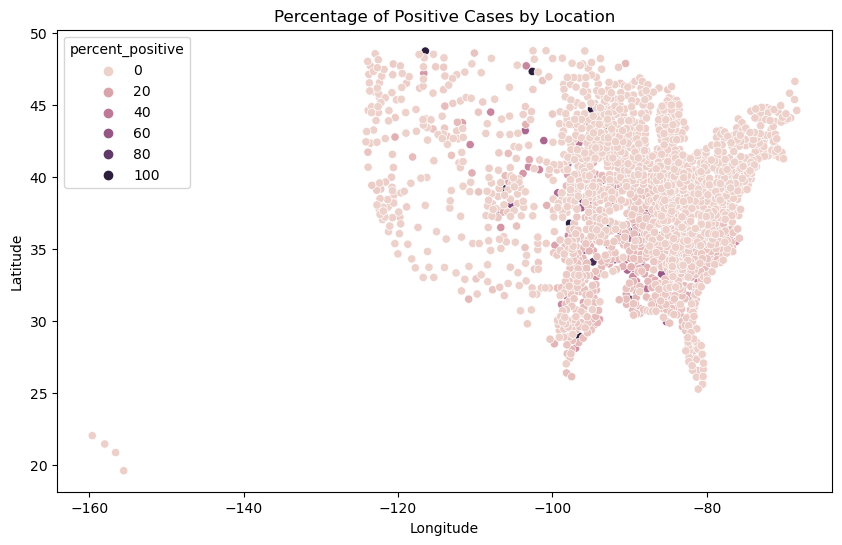

In [52]:
#Scatter plot of latitude and longitude with color representing the percentage of positive cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='percent_positive', data=lat_long_group)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Percentage of Positive Cases by Location')
plt.show()

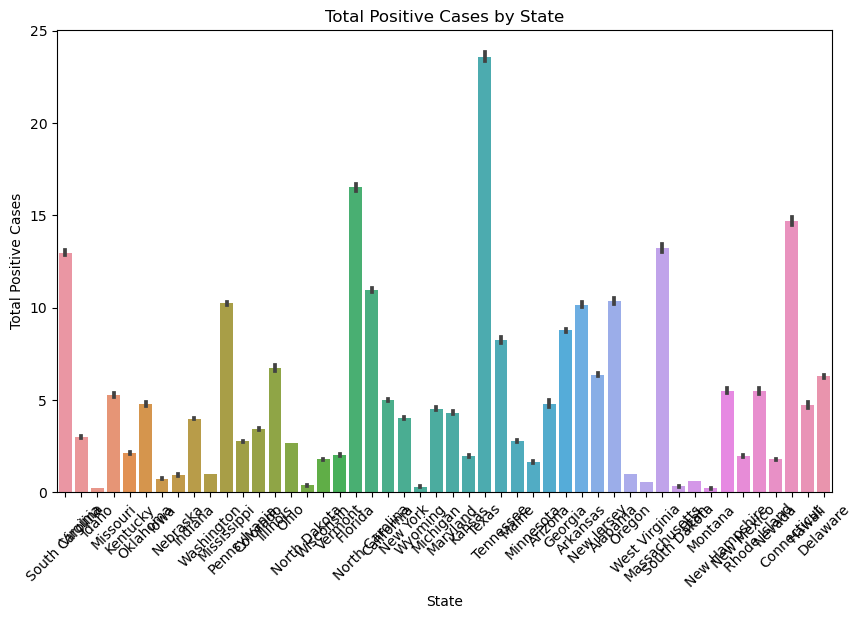

In [55]:
#Bar plot for Total Positive Cases by State

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Total_positive', data=merged_df)
plt.xlabel('State')
plt.ylabel('Total Positive Cases')
plt.title('Total Positive Cases by State')
plt.xticks(rotation=45)
plt.show()


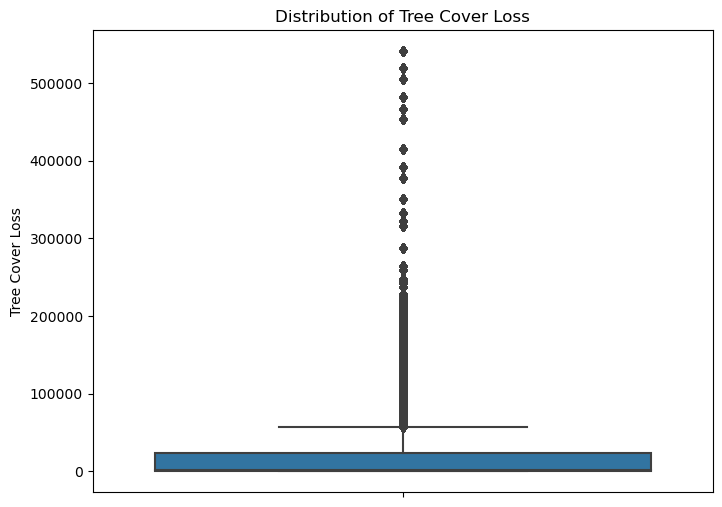

In [56]:
#Box plot for Distribution of Tree Cover Loss

plt.figure(figsize=(8, 6))
sns.boxplot(y='tc_loss_ha', data=merged_df)
plt.ylabel('Tree Cover Loss')
plt.title('Distribution of Tree Cover Loss')
plt.show()

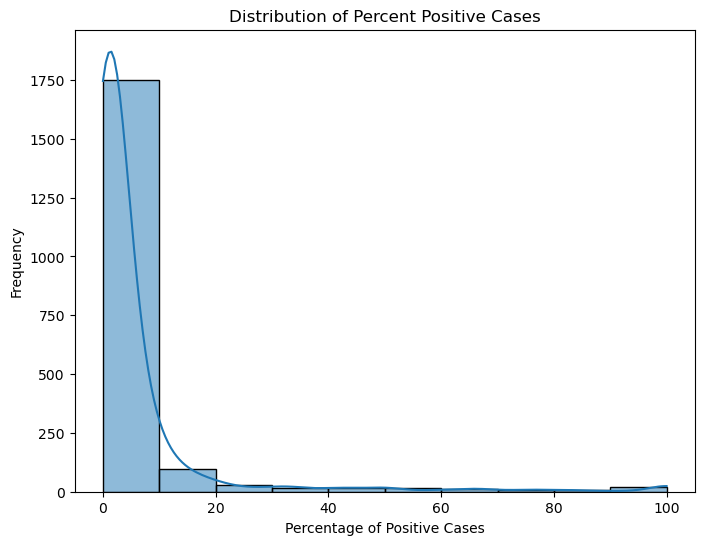

In [57]:
#Histogram for Distribution of Percent Positive Cases
plt.figure(figsize=(8, 6))
sns.histplot(data=lat_long_group, x='percent_positive', bins=10, kde=True)
plt.xlabel('Percentage of Positive Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Percent Positive Cases')
plt.show()

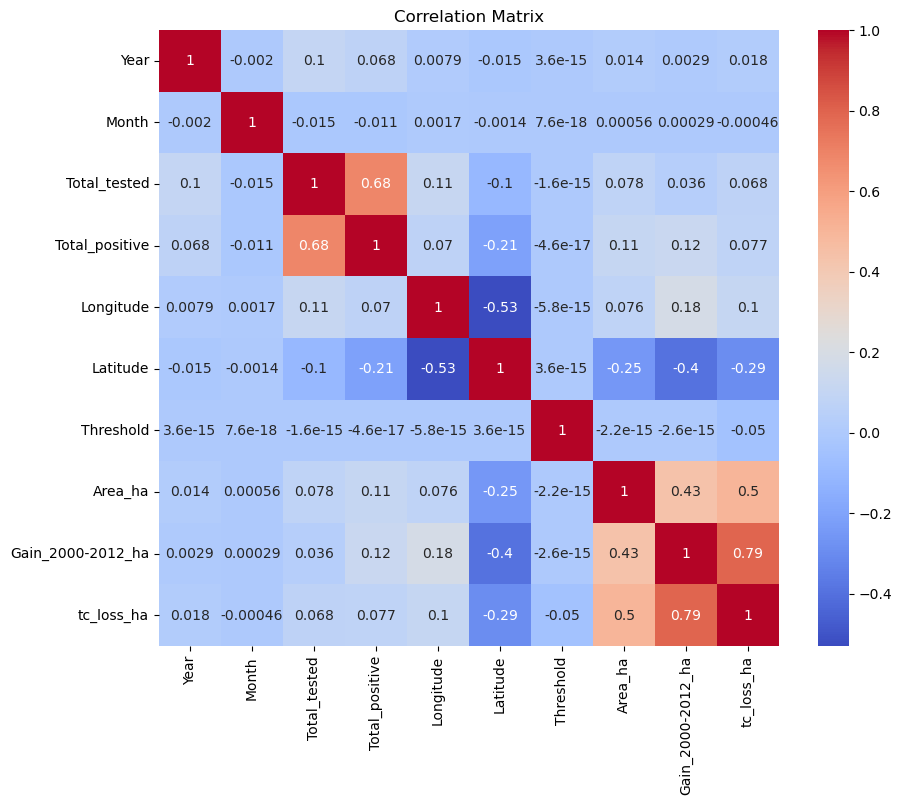

In [58]:
#Heatmap for correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

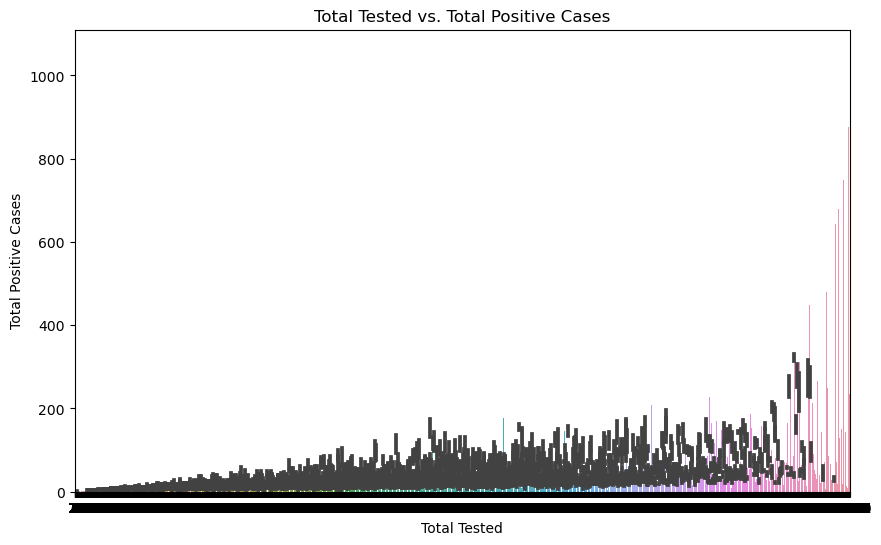